## Fourier transform

This notebook showcases the use of the Fourier transform as an operator in two dimensions. Everything shown here works completely analogously in higher dimensions (and one dimension if applicable).

In $d$ dimensions, the Fourier transform is defined as

$$
\widehat{f}(\xi) = \mathcal{F}(f)(\xi) = (2\pi)^{-\frac{d}{2}}
    \int_{\mathbb{R}^d} f(x)\ e^{-i \langle x, \xi\rangle} \, \mathrm{d}x
$$

and can be applied to, e.g., functions in $L^2(\mathbb{R}^d)$. ODL offers a way to use the discretization of this transform as an operator, thus making it available for all thinkable purposes in numerical methods.

In [1]:
import odl
import numpy as np

First, we define a discretization of the complex space $L^2(\Omega, \mathbb{C})$ for a rectangular domain $\Omega \subset \mathbb{R}^2$. We choose $\Omega = [-2, 2] \times [0, 1]$ and square pixels:

In [2]:
l2_discr = odl.uniform_discr([-2, 0], [2, 1], nsamples=(400, 100), dtype=complex)

In [3]:
l2_discr.domain

Rectangle([-2.0, 0.0], [2.0, 1.0])

In [4]:
l2_discr.cell_sides  # Side lengths of the pixels

array([ 0.01,  0.01])

Next, we createt the Fourier transform operator on this domain. Its range is inferred by default but can be specified explicitly. For the computation of the trigonometric sums (DFT), the [Numpy backend built on FFTPACK](http://docs.scipy.org/doc/numpy/reference/routines.fft.html) is used by default. ODL also supports the significantly faster [pyFFTW](https://pypi.python.org/pypi/pyFFTW) backend (requires installation of that package).

In [5]:
fourier_trafo = odl.trafos.FourierTransform(l2_discr)

Now the FT is available as an operator. We can check on which domain the transformed functions are defined:

In [6]:
fourier_trafo.range.domain  # The definition domain of functions in the range of the transform

Rectangle([-314.9446635223768, -317.30085801256911], [313.37386719558185, 311.01767270538954])

The side lenghts of the rectangle are $2\pi / s$, where $s = 0.01$ is the pixel side length of the real space grid. Note that the rectangle is slightly shifted into the negative direction (this can be controlled with a parameter).

In [7]:
fourier_trafo.range.domain.extent() * fourier_trafo.domain.cell_sides / (2 * np.pi)

array([ 1.,  1.])

Now let's create a function and transform it!

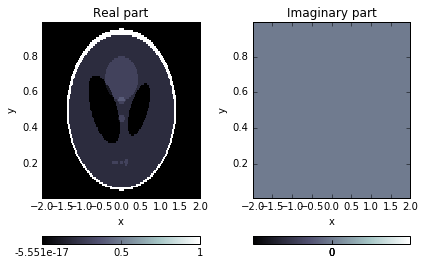

In [8]:
% matplotlib inline
phantom = odl.util.phantom.shepp_logan(l2_discr, modified=True)  # Shepp-Logan phantom in the discretized space
fig = phantom.show('The famous Shepp-Logan phantom')  # Storing the figure so we don't get two inline plots

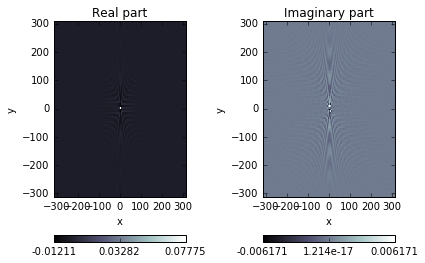

In [9]:
phantom_ft = fourier_trafo(phantom)
fig = phantom_ft.show('Fourier transform of the phantom')

We can also calculate partial Fourier transform, e.g. only along the first coordinate axis:

$$
\mathcal{F}_0(f)(\xi_0, x_1) = (2\pi)^{-\frac{1}{2}}
    \int_{\mathbb{R}} f(x_0, x_1)\ e^{-i x_0 \xi_0} \, \mathrm{d}x_0
$$

This is done with the `axes` parameter in the initialization of the FT:

In [10]:
partial_ft = odl.trafos.FourierTransform(l2_discr, axes=[0])

Let's check out the definition domain of functions transformed by this operator.

In [11]:
partial_ft.range.domain

Rectangle([-314.9446635223768, 8.6736173798840355e-19], [313.37386719558185, 1.0])

Only the first axis of the domain has been transformed into reciprocal space. So how does such a transform look like?

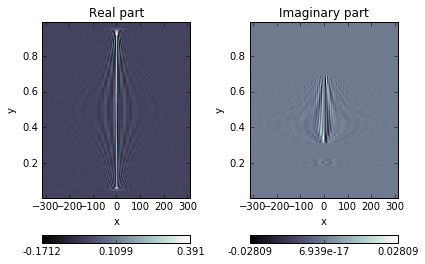

In [12]:
phantom_partial_ft = partial_ft(phantom)
fig = phantom_partial_ft.show('Partial FT along the first axis')